In [ ]:
# Install Required Libraries
!pip install pytesseract
!sudo apt install tesseract-ocr
!pip install transformers

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
!pip install PyPDF2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 8.8 MB/s eta 0:00:00


In [ ]:
pip install pdfplumber pytesseract pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 93.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 107.9 MB/s eta 0:00:00


1. Import Necessary Libraries and load the summarization model

In [ ]:
import re
import pytesseract
from pdfminer.high_level import extract_text
from PIL import Image
from transformers import pipeline

# Load Summarization Model
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0


2. Function to Extract Text from PDF

In [ ]:
def clean_text(text):
    """Remove URLs, unwanted characters, and extra spaces from extracted text."""
    text = re.sub(r'http[s]?://\S+', '', text)  # Remove links
    text = re.sub(r'www\.\S+', '', text)  # Remove website URLs
    text = re.sub(r'\n+', ' ', text).strip()  # Replace multiple newlines with space
    return text

In [ ]:
def extract_text_from_pdf(pdf_path):
    """Extracts text from a PDF file."""
    text = extract_text(pdf_path)
    return clean_text(text)

3. Function to Extract Text from Image using OCR

In [ ]:
def extract_text_from_image(image_path):
    """Extracts text from an image using OCR (Tesseract)."""
    image = Image.open(image_path)
    text = pytesseract.image_to_string(image)
    return clean_text(text)

4. Function to Summarize Legal Document

In [ ]:
def chunk_text(text, chunk_size=1000):
    """Splits large text into smaller chunks to avoid exceeding model limits."""
    return [text[i:i+chunk_size] for i in range(0, len(text), chunk_size)]

def summarize_text(text, max_length=200, min_length=50):
    """Summarizes the input text while preserving meaning."""
    chunks = chunk_text(text)
    summaries = []
    for chunk in chunks:
        try:
            summary = summarizer(chunk, max_length=max_length, min_length=min_length, do_sample=False)
            summaries.append(summary[0]['summary_text'])
        except Exception as e:
            print(f"Error summarizing chunk: {e}")
    return " ".join(summaries)

5. function to evaluate the summary

In [ ]:
!pip install evaluate bert-score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 120.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 44.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12


In [ ]:
from evaluate import load
import bert_score

# Load metrics
bertscore = load("bertscore")

def evaluate_summary(original_text, summary, reference_summary=None):
    results = {}
    # BERTScore
    bert = bertscore.compute(predictions=[summary], references=[original_text], lang="en")
    results["BERTScore (F1)"] = bert["f1"][0]

    # Compression Ratio
    results["Compression Ratio"] = round(len(summary) / len(original_text), 3)

    return results

In [ ]:
def handle_input(input_type, file_path=None):
    """Handles user input for text, PDF, and image summarization + evaluation."""
    if input_type == "text":
        text = input("Enter the text to summarize: ")
    elif input_type == "pdf":
        text = extract_text_from_pdf(file_path)
    elif input_type == "image":
        text = extract_text_from_image(file_path)
    else:
        print("Invalid input type. Please enter 'text', 'pdf', or 'image'.")
        return

    if not text.strip():
        print("Error: Extracted text is empty. Please check your input file.")
        return

    summary = summarize_text(text)
    print("\n📝 **Summary:**\n", summary)

    # Optional: ask for reference summary
    reference_summary = input("\n(Optional) Enter human-written reference summary for evaluation (or press Enter to skip): ").strip()
    if reference_summary == "":
        reference_summary = None

    # ✅ Evaluate the summary
    metrics = evaluate_summary(text, summary, reference_summary)
    print("\n📊 **Evaluation Metrics:**")
    for key, value in metrics.items():
        print(f"{key}: {value:.4f}")

## Gardio UI

In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.3/323.3 kB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 130.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 6.7 MB/s eta 0:00:00


In [ ]:
import gradio as gr
def gradio_handle_input(input_type, text_input, image_input, pdf_input):
    if input_type == "Text":
        text = text_input
    elif input_type == "Image":
        if image_input is None:
            return "", "", "Please upload an image."
        text = extract_text_from_image(image_input)
    elif input_type == "Pdf":
        if pdf_input is None:
            return "", "", "Please upload a PDF file."
        text = extract_text_from_pdf(pdf_input.name)
    else:
        return "", "", "Invalid input type."

    text = clean_text(text)
    if not text.strip():
        return "", "", "Error: extracted text is empty."

    summary = summarize_text(text)

    # Run evaluation metrics
    results = evaluate_summary(original_text=text, summary=summary)
    eval_report = "\n".join([f"{k}: {round(v, 4)}" for k, v in results.items()])

    return text, summary, eval_report

In [ ]:
# Toggle logic
def toggle_inputs(choice):
    return (
        gr.update(visible=choice == "Text", value=""),
        gr.update(visible=choice == "Image"),
        gr.update(visible=choice == "Pdf"),
        gr.update(value=""),  # Clear preview if needed
        "", ""
    )

In [ ]:
# Summary download
import os

def download_summary(summary):
    if not summary.strip():
        return gr.update(visible=False), None

    file_path = "summary.txt"
    with open(file_path, "w", encoding="utf-8") as f:
        f.write(summary)
    return gr.update(visible=True, value=file_path)

In [ ]:
with gr.Blocks(
    css="""
    #side-panel {
        background-color: #f0f0f0;
        padding: 20px;
        min-height: 100vh;
        border-right: 1px solid #ccc;
    }
    #main-panel {
        padding: 20px;
    }
    footer {visibility: hidden;}
    .custom-btn {
        background-color: #AFA939 !important;
        color: white !important;
        border: none;
        border-radius: 8px;
        padding: 8px 16px;
        font-weight: bold;
    }
    """,
    title="Legal Document Summarization"
) as demo:

    with gr.Row():
        # SIDE PANEL
        with gr.Column(scale=2, elem_id="side-panel"):
            gr.Markdown("## 📄 Legal Document Summarization")
            gr.Markdown(
                "### 📘 **Steps to Use:**\n"
                "1. Choose input type (✍️ Text / 📄 PDF / 🖼️ Image)  \n"
                "2. Enter your text or upload a file  \n"
                "3. Click **📝 Summarize** .\n"
                "4. View original input and ✂️ summary below "
            )

            input_type = gr.Radio(choices=["Text", "Pdf", "Image"], label="Select Input Type", value="text")
            text_input = gr.Textbox(label="✍️ Enter Text", lines=5)
            image_input = gr.Image(label="📷 Upload Image", visible=False, type="filepath")
            pdf_input = gr.File(label="📄 Upload PDF", file_types=[".pdf"], visible=False)
            with gr.Row():
                submit_btn = gr.Button("📝 Summarize", elem_classes="custom-btn")

        # MAIN PANEL with scroll
        with gr.Column(scale=3, elem_id="main-panel"):
            with gr.Column():
                gr.Markdown("⏳ *Note: Summarization may take some time depending on file size and system performance.*")
                gr.Markdown("🔍 **Summary Output**")
                output = gr.Textbox(label="", lines=5, interactive=False)
                gr.Markdown("📊 **Evaluation Metrics**")
                eval_output = gr.Textbox(label="", lines=3, interactive=False)
                download_btn = gr.Button("⬇️ Download Summary", elem_classes="custom-btn")
                file_output = gr.File(label="Download Summary", visible=False)

    gr.Markdown("""
---
> ⚠️ **Disclaimer:** This tool provides automatic summarizations of legal documents **for educational purposes only.**
> It does **not** constitute legal advice or professional consultation.
> Please consult a qualified legal professional for any legal matters.
""")

    # Input toggle logic
    input_type.change(
        fn=toggle_inputs,
        inputs=input_type,
        outputs=[text_input, image_input, pdf_input, output, text_input, output]
    )

    # Submission handling
    submit_btn.click(
        fn=gradio_handle_input,
        inputs=[input_type, text_input, image_input, pdf_input],
        outputs=[text_input, output, eval_output]
    )

    # Download handling
    download_btn.click(
        fn=download_summary,
        inputs=output,
        outputs=file_output
    )

demo.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://6e4d8a754870da4464.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


### 🔗 IMPORTANT: Gradio Link for Website

After running this notebook, Gradio will generate a **new public link** (e.g., `https://xyz123.gradio.live`).

📌 Please follow these steps:

1. **Copy the public Gradio link** shown in the output after `launch()` (usually something like `https://abc123.gradio.live`)
2. **Open your `index.html` file** inside the `Verdict AI UI\templates ` folder
3. Replace the old link for this feature with the new one using the following format:

```html
<!-- Example -->
<a href="https://new-chatbot-link.gradio.live" target="_blank">Open Legal Document Summarization</a>


# Evaluation

## Example 1

Sample Legal Document (NDA)
NON-DISCLOSURE AGREEMENT

This Non-Disclosure Agreement ("Agreement") is made and entered into as of February 27, 2025, by and between:

1. Disclosing Party: XYZ Tech Solutions Pvt. Ltd., a company incorporated under the laws of India, having its registered office at 123 Tech Park, Bangalore, Karnataka, India.

2. Receiving Party: John Doe, an individual with an address at 456 Elm Street, Mumbai, Maharashtra, India.

1. Purpose
The Disclosing Party possesses certain confidential and proprietary information related to its technology, business strategy, and financial data. The Receiving Party wishes to evaluate this information solely for the purpose of exploring a potential business relationship.

2. Definition of Confidential Information
"Confidential Information" includes, but is not limited to:

Trade secrets, business plans, marketing strategies, and customer lists.
Financial reports, pricing structures, and investment strategies.
Technical data, software codes, algorithms, and product designs.
3. Obligations of the Receiving Party
The Receiving Party agrees to:

Maintain the confidentiality of all disclosed information.
Not disclose, publish, or share any Confidential Information with third parties.
Use the Confidential Information only for the intended business purpose.
Return or destroy all Confidential Information upon request.
4. Exclusions
Confidential Information does not include information that:

Is publicly available at the time of disclosure.
Becomes publicly available without a breach of this Agreement.
Is independently developed without reference to the disclosed information.
5. Term and Termination
This Agreement remains in effect for two (2) years from the date of signing. The confidentiality obligations shall survive for five (5) years after termination.

6. Governing Law
This Agreement shall be governed by and construed in accordance with the laws of India. Any disputes shall be subject to the exclusive jurisdiction of the courts in Bangalore, Karnataka.

7. Signatures
By signing below, both parties agree to the terms outlined in this Agreement.

XYZ Tech Solutions Pvt. Ltd.
Authorized Signatory: _______________
Date: _______________

John Doe
Signature: _______________
Date: _______________

In [ ]:
input_type = input("Enter input type (text/pdf/image): ").strip().lower()
file_path = None

if input_type in ["pdf", "image"]:
    file_path = input("Enter file path: ").strip()

handle_input(input_type, file_path)

Enter input type (text/pdf/image): text
Enter the text to summarize: Sample Legal Document (NDA) NON-DISCLOSURE AGREEMENT  This Non-Disclosure Agreement ("Agreement") is made and entered into as of February 27, 2025, by and between:  1. Disclosing Party: XYZ Tech Solutions Pvt. Ltd., a company incorporated under the laws of India, having its registered office at 123 Tech Park, Bangalore, Karnataka, India.  2. Receiving Party: John Doe, an individual with an address at 456 Elm Street, Mumbai, Maharashtra, India.  1. Purpose The Disclosing Party possesses certain confidential and proprietary information related to its technology, business strategy, and financial data. The Receiving Party wishes to evaluate this information solely for the purpose of exploring a potential business relationship.  2. Definition of Confidential Information "Confidential Information" includes, but is not limited to:  Trade secrets, business plans, marketing strategies, and customer lists. Financial reports, pr

Your max_length is set to 200, but your input_length is only 188. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=94)
Your max_length is set to 200, but your input_length is only 67. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=33)



📝 **Summary:**
 This Non-Disclosure Agreement ("Agreement") is made and entered into as of February 27, 2025. The Disclosing Party possesses certain confidential and proprietary information related to its technology, business strategy, and financial data. The Receiving Party wishes to evaluate this information solely for the purpose of exploring a potential business relationship. Confidential Information does not include information that:  Is publicly available at the time of disclosure. Becomes publicly available without a breach of this Agreement. Is independently developed without reference to the disclosed information. Return or destroy all Confidential Information upon request. Both parties agree to the terms outlined in this Agreement.  XYZ Tech Solutions Pvt. Ltd.  the courts in Bangalore, Karnataka.  7. Signatures by signing below, both parties agree.   John Doe Signature: _______________ Date: _______

(Optional) Enter human-written reference summary for evaluation (or press 

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



📊 **Evaluation Metrics:**
BERTScore (F1): 0.8987
Compression Ratio: 0.3980


## Example 2

In [ ]:
input_type = input("Enter input type (text/pdf/image): ").strip().lower()
file_path = None

if input_type in ["pdf", "image"]:
    file_path = input("Enter file path: ").strip()

handle_input(input_type, file_path)

Enter input type (text/pdf/image): pdf
Enter file path: /content/NDA - Intern DA.pdf


Your max_length is set to 200, but your input_length is only 191. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=95)
Your max_length is set to 200, but your input_length is only 199. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=99)
Your max_length is set to 200, but your input_length is only 185. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=92)



📝 **Summary:**
 This Non-Disclosure Agreement (the "Agreement") is made and entered into as of 17.08.2024, by and between: Sunix AI Pvt Ltd, a company duly organized and existing under the laws of Karnataka, India. The Company and the Employee may be referred to collectively as the "Parties" and individually as a "Party" Confidential Information may include, without limitation, trade secrets, technical data, know-how, business plans, strat. s engaged to provide Software Development services to the Company. The Parties agree that they may disclose certain Confidential Information (as defined below) to each other. The Receiving Party agrees to hold all Confidential Information in strict confidence. The obligations set forth in this Agreement shall not apply to any information that. Is or becomes publicly known through no fault of the Receiving. Party. Exceptions: Information that. Was rightfully in the receiving Party's possession or known to the Receising Party prior to receip. If an e

## Example 3

In [ ]:
input_type = input("Enter input type (text/pdf/image): ").strip().lower()
file_path = None

if input_type in ["pdf", "image"]:
    file_path = input("Enter file path: ").strip()

handle_input(input_type, file_path)

Enter input type (text/pdf/image): pdf
Enter file path: /content/case judgement.pdf


Your max_length is set to 200, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)



📝 **Summary:**
 The impugned Act is within the legislative  competence of the State legislature. We find no force in the contention. Since the legislature is competent to enact  the law,  all the agricultural holdings  covered under the Act are equally re-enacted. We find no force in the contention. The procedure  is  only  supplemental  or residual to the main  purpose of the Act. There is  no discrimination  violating Art.14. gulated thereunder. We find  that the summary procedure  causes   minimum inconvenience  to the litigants, which is  just and fair. Letter Patent Appeal was taken away under the Act. We find no force in the contention. Creation of  the hierarchy of the court is  one of  legislative policy. The legislature limited the remedy by providing  for only one appeal to the High Court before a learned single Judge. L is accordingly dismissed. No costs. l will be paid no costs by the Court of Arbitration for Human Rights. L will not be paid any costs for this action. l is

## Example 4

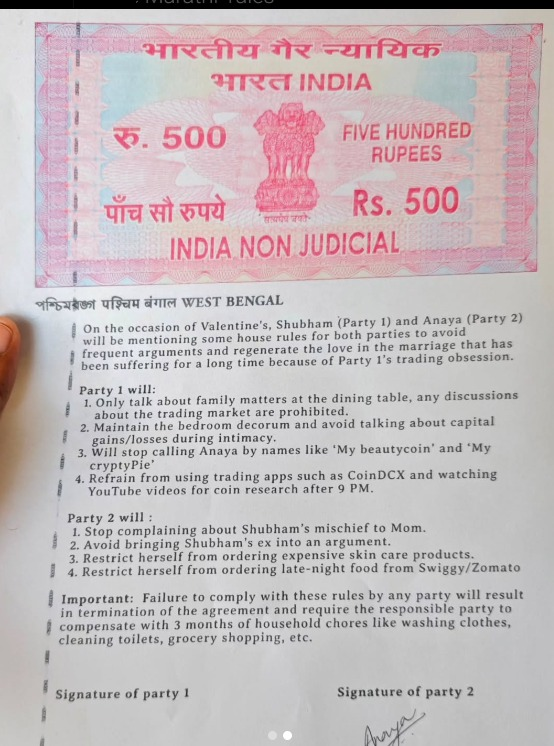

In [ ]:
input_type = input("Enter input type (text/pdf/image): ").strip().lower()
file_path = None

if input_type in ["pdf", "image"]:
    file_path = input("Enter file path: ").strip()

handle_input(input_type, file_path)

Enter input type (text/pdf/image): image
Enter file path: /content/divorce notice.jpg


Your max_length is set to 200, but your input_length is only 85. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=42)



📝 **Summary:**
 Vater will be mentioning some house rules for both ‘nt arguments and regenerate the love in the m: ’a long time. Party 1 will: 1 Only talk about family matters at the dining table, any discussions about the trading market are prohibited, 2, Maintain the bedroom decorum and avoid talking about capital i i f ~ gains/losses during intimacy. 3, Will stop calling Anaya by names like ‘My beautycoin’ and “My cryptyPie’ 4. Refrain from using trading apps such as CoinDCX and watehing YouTube videos for coin research after 9 PM. 4 Restrict herself from ordering late-night food from Swiggy/Zomato. Failure to comply with these rules by any party will result in termination of the agreement and require the responsible party to f compensate with 3 months of household chores.

(Optional) Enter human-written reference summary for evaluation (or press Enter to skip): 

📊 **Evaluation Metrics:**
BERTScore (F1): 0.9006
Compression Ratio: 0.5540


## Example 5

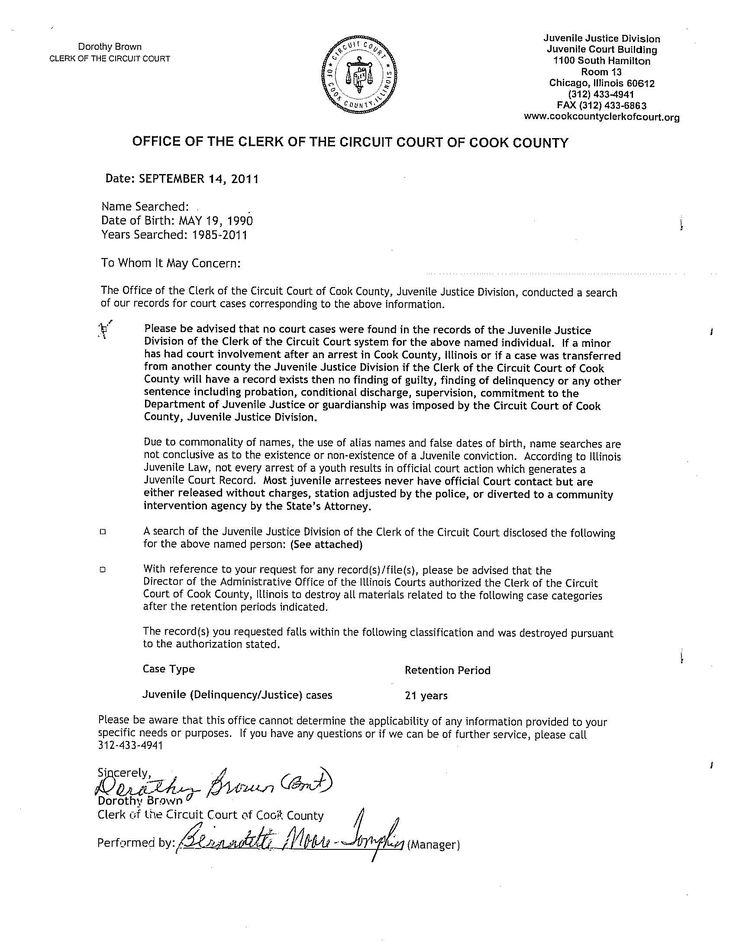

In [ ]:
input_type = input("Enter input type (text/pdf/image): ").strip().lower()
file_path = None

if input_type in ["pdf", "image"]:
    file_path = input("Enter file path: ").strip()

handle_input(input_type, file_path)

Enter input type (text/pdf/image): image
Enter file path: /content/legal letter.jpg


Your max_length is set to 200, but your input_length is only 196. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=98)
Your max_length is set to 200, but your input_length is only 158. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=79)



📝 **Summary:**
 The Office of the Clerk of the Circuit Court of Cook County, Juvenile Justice Division, conducted a search ‘of our records for court cases corresponding to the above information,’ it said. ‘Please be advised that no court cases were found in the records of the Juvenile justice Division of the clerk of the circuit court system for the above named individual.’ Not every arrest of a youth results in official court action which generates a Juvenile Court Record. Most juvenile arrestees never have official Court contact but are either released without charges, station adjusted by the police, or diverted to a community Intervention agency. Due to commonality of names, the use of alias names and false dates of birth, name searches are not conclusive. All materials related to the following case categories after the retention periods indicated, ‘The record(s) you requested falls within the following classification and was destroyed pursuant to the authorization stated, Case Typ